## MatBERT training loss curve

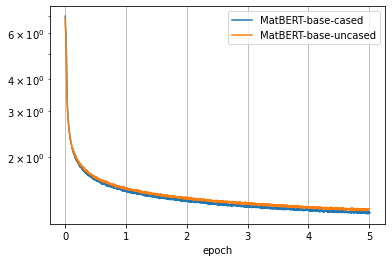

In [10]:
import pandas
import matplotlib.pyplot as plt

models_cased_loss = pandas.read_csv('./model_2Mpapers_cased_30522_wd.csv')
models_uncased_loss = pandas.read_csv('./model_2Mpapers_uncased_30522_wd.csv')

models_cased_loss.plot(x='epoch', y='mlm_loss', ax=plt.gca(), label='MatBERT-base-cased')
models_uncased_loss.plot(x='epoch', y='mlm_loss', ax=plt.gca(), label='MatBERT-base-uncased')
plt.yscale('log')
plt.grid('on')
plt.show()

## Tokenizer comparison

In [15]:
from transformers import BertTokenizerFast

tokenizer = BertTokenizerFast.from_pretrained('../models/matbert-base-cased/', do_lower_case=False)
tokenizer_bert = BertTokenizerFast.from_pretrained('bert-base-cased', do_lower_case=False)

for i in ['Fe(NO3)3• 9H2O', 'La0.85Ag0.15Mn1−yAlyO3']:
    print(i)
    print('='*100)
    print('MatBERT tokenizer:', tokenizer.tokenize(i))
    print('BERT tokenizer:', tokenizer_bert.tokenize(i))

Fe(NO3)3• 9H2O
MatBERT tokenizer: ['Fe', '(', 'NO3', ')', '3', '•', '9H2O']
BERT tokenizer: ['Fe', '(', 'NO', '##3', ')', '3', '•', '9', '##H', '##2', '##O']
La0.85Ag0.15Mn1−yAlyO3
MatBERT tokenizer: ['La0', '.', '85', '##Ag', '##0', '.', '15', '##Mn1', '##−y', '##Al', '##y', '##O3']
BERT tokenizer: ['La', '##0', '.', '85', '##A', '##g', '##0', '.', '15', '##M', '##n', '##1', '##−', '##y', '##A', '##ly', '##O', '##3']


## Masked language modeling for materials science inference

In [11]:
from transformers import BertForMaskedLM, BertTokenizerFast, pipeline

tokenizer = BertTokenizerFast.from_pretrained('../models/matbert-base-cased/', do_lower_case=False)
model = BertForMaskedLM.from_pretrained('../models/matbert-base-cased/')
fill_mask = pipeline(
    "fill-mask",
    model=model,
    tokenizer=tokenizer
)

In [12]:
fill_mask('TiO2 is a [MASK] thermoelectric.')

[{'sequence': '[CLS] TiO2 is a good thermoelectric. [SEP]',
  'score': 0.5292941927909851,
  'token': 3177,
  'token_str': 'good'},
 {'sequence': '[CLS] TiO2 is a typical thermoelectric. [SEP]',
  'score': 0.06705645471811295,
  'token': 3983,
  'token_str': 'typical'},
 {'sequence': '[CLS] TiO2 is a strong thermoelectric. [SEP]',
  'score': 0.057758502662181854,
  'token': 2817,
  'token_str': 'strong'},
 {'sequence': '[CLS] TiO2 is a promising thermoelectric. [SEP]',
  'score': 0.04165131226181984,
  'token': 5608,
  'token_str': 'promising'},
 {'sequence': '[CLS] TiO2 is a known thermoelectric. [SEP]',
  'score': 0.022214455530047417,
  'token': 3276,
  'token_str': 'known'}]

In [13]:
fill_mask("This paper is [MASK].")

[{'sequence': '[CLS] This paper is short. [SEP]',
  'score': 0.05745580419898033,
  'token': 3652,
  'token_str': 'short'},
 {'sequence': '[CLS] This paper is organized. [SEP]',
  'score': 0.05405081436038017,
  'token': 10197,
  'token_str': 'organized'},
 {'sequence': '[CLS] This paper is ongoing. [SEP]',
  'score': 0.04968896135687828,
  'token': 13879,
  'token_str': 'ongoing'},
 {'sequence': '[CLS] This paper is complete. [SEP]',
  'score': 0.04325306415557861,
  'token': 4452,
  'token_str': 'complete'},
 {'sequence': '[CLS] This paper is continuing. [SEP]',
  'score': 0.032858941704034805,
  'token': 19246,
  'token_str': 'continuing'}]

In [16]:
fill_mask(
    'An energy density of [MASK] W h kg-1 is achieved. '
    'Fluorinated DRXs have recently demonstrated reversible capacities 800 mA h g-1 and '
    'extremely high energy densities approaching 1000 W h kg-1 '
    ', holding promise for a nearly two-fold '
    'increase in the energy density of commercial lithium-ion batteries. ')

[{'sequence': '[CLS] An energy density of 1000 W h kg - 1 is achieved. Fluorinated DRXs have recently demonstrated reversible capacities 800 mA h g - 1 and extremely high energy densities approaching 1000 W h kg - 1, holding promise for a nearly two - fold increase in the energy density of commercial lithium - ion batteries. [SEP]',
  'score': 0.06783945113420486,
  'token': 4771,
  'token_str': '1000'},
 {'sequence': '[CLS] An energy density of 800 W h kg - 1 is achieved. Fluorinated DRXs have recently demonstrated reversible capacities 800 mA h g - 1 and extremely high energy densities approaching 1000 W h kg - 1, holding promise for a nearly two - fold increase in the energy density of commercial lithium - ion batteries. [SEP]',
  'score': 0.04928496852517128,
  'token': 5504,
  'token_str': '800'},
 {'sequence': '[CLS] An energy density of 500 W h kg - 1 is achieved. Fluorinated DRXs have recently demonstrated reversible capacities 800 mA h g - 1 and extremely high energy densities

In [17]:
fill_mask(
    'The target material was calcined for [MASK] h. '
    'α-Fe2O3 used in present study was prepared by a combination of precipitation '
    'and spray-drying technologies. In brief, a solution containing Fe(NO3)3• 9H2O '
    'was used in precipitation with NH4OH solution as a precipitator at pH = 8.5~9.0 '
    'and T = 70 °C. The precipitate was washed and then filtered. The mixture was '
    'reslurried and spray-dried. Finally, a sample with diameters of 20~26 μm was '
    'calcined at 450 °C for 2 h in a muffle furnace.')

[{'sequence': '[CLS] The target material was calcined for 2 h. α - Fe2O3 used in present study was prepared by a combination of precipitation and spray - drying technologies. In brief, a solution containing Fe ( NO3 ) 3 • 9H2O was used in precipitation with NH4OH solution as a precipitator at pH = 8. 5 ~ 9. 0 and T = 70 °C. The precipitate was washed and then filtered. The mixture was reslurried and spray - dried. Finally, a sample with diameters of 20 ~ 26 μm was calcined at 450 °C for 2 h in a muffle furnace. [SEP]',
  'score': 0.8691782355308533,
  'token': 22,
  'token_str': '2'},
 {'sequence': '[CLS] The target material was calcined for 4 h. α - Fe2O3 used in present study was prepared by a combination of precipitation and spray - drying technologies. In brief, a solution containing Fe ( NO3 ) 3 • 9H2O was used in precipitation with NH4OH solution as a precipitator at pH = 8. 5 ~ 9. 0 and T = 70 °C. The precipitate was washed and then filtered. The mixture was reslurried and spray

In [18]:
questions = [
    'All starting materials were reagent grade chemicals (Wako Pure Chem., Ind., Co.), such as NaOH (≥97.0%), P2O5 (≥98.0%), V2O5 (≥99.0%), Ca(NO3)2·4H2O (≥98.5%), and Sr(NO3)2 (≥98.0%). The substituted hydroxyapatites and their solid solutions were prepared by the hydrothermal methods described in detail . Firstly, solution A containing strontium nitrate and/or calcium nitrate (total 3.34 mmol) in 8 ml of distilled water was added into solution B containing P2O5 and/or V2O5 (total 1 mmol) in 7 ml of distilled water with NaOH, so that (Ca + Sr)/(P + V) molar ratios in the mixed solution were 1.67. The amounts of added NaOH were 14 and 7 mmol in the case of the preparation of hydroxyapatites with and without vanadate, respectively . The resultant suspension was treated under the hydrothermal condition at 110 °C for 14 h with agitation in an autoclave lined with Teflon. After the hydrothermal treatment, the resultant precipitates were washed by the centrifugal separation with distilled water, and then it was dried at 60 °C for 5 h.',
    'α-Fe2O3 used in present study was prepared by a combination of precipitation and spray-drying technologies. In brief, a solution containing Fe(NO3)3• 9H2O was used in precipitation with NH4OH solution as a precipitator at pH = 8.5~9.0 and T = 70 °C. The precipitate was washed and then filtered. The mixture was reslurried and spray-dried. Finally, a sample with diameters of 20~26 μm was calcined at 450 °C for 5 h in a muffle furnace.',
    'The aqueous solution of 0.5 M Y(NO3)3, 0.025 M Ba(NO3)2, 0.5 M Cu(NO3)2 and 0.5 M Al(NO3)3 was prepared by dissolving into distilled water. All reagents used were analytical grade and 99.9% pure. The Y(NO3)3, Ba(NO3)2, Cu(NO3)2 and Al(NO3)3 were mixed by the mole ratio of 1:2:3:x respectively where was varied from 0.02 to 0.1 mol. Accordingly, a mixture without Al addition was prepared to be used as a reference solution. Calculated amount of citric acid was added to the mixture and the pH was adjusted to 7 by adding ammonia solution. The as-prepared solution was heated on the hot plate at 250 °C with an infrared lamp on top of it to provide a uniform heating. Continuous heating process turned this solution to a dark blue gel which was combusted and yielded dark brown fine ashes. Most of the combustion process involved flame which turned the gel into a very fine, spongy and brownish black ash. Subsequently, the ashes were calcined inside a furnace at 900 °C for 1 h under normal atmosphere and self-cooled to room temperature. Calcination process transformed these highly hygroscopic and reactive ashes into a more stable, black and dense powder. Calcined powders were pelletized to the dimension of 10 mm × 2 mm pellet by applying 12.4 MPa load. The pellets were sintered at 960 °C for 1 h under normal atmosphere then soaked for 20 h at 500 °C in oxygen flow (50 ml min−1). The resultant pure YBa2Cu3O7powder was abbreviated as YBCO and the Al2O3 added YBa2Cu3O7 powder samples were tagged according to the mole number of Al nitrate addition.',
    'Polycrystalline A2TiO5 samples were synthesized by solid-state methods from A2O3 and TiO2 powders. The typical grain size of the samples was several microns. The powders were then pressed into thin pellets, ground to a thickness of ~ 40 µm, and subsequently sintered at 800 °C for 24 h. For irradiation experiments, a small portion of the sintered pellets were carefully mounted onto a 1 cm × 1 cm aluminum plate holder using a double-sided tape. To prevent the samples from falling during the irradiation process, a thin layer of metal, resistant to melt during irradiation, was further glued on a small portion of the pellets. The pellets were irradiated at the × 0 beamline of the UNILAC linear accelerator at the GSI Helmholtz Center for Heavy Ion Research in Darmstadt, Germany. All irradiations were performed at room temperature under vacuum using 2.2 GeV Au ions and various fluences up to 3 × 1013 ions/cm2. To prevent bulk heating of the samples, the ion flux was maintained below 2 × 109 ions/cm2/s1. The typical fluence uncertainty was 10–15%. SRIM-2008 code was used to determine the electronic energy loss as a function of sample penetration depth ( Fig. 2). The electronic energy loss (dE/dx)e for Yb2TiO5, Gd2TiO5 and Nd2TiO5 is 44.8 keV/nm, 38.1 keV/nm and 35.01 keV/nm at the sample surface, respectively. Mass densities used for the SRIM calculations were: Nd2TiO5 = 5.73 g/cm3; Gd2TiO5 = 6.62 g/cm3; Yb2TiO5 = 7.96 g/cm3. The calculations indicated projected ion ranges between 60 and 70 µm. Therefore, the 2.2 GeV Au ions passed completely through all samples. The corresponding nuclear energy loss is about three orders of magnitude smaller than the electronic energy loss and is thus assumed to be negligible.',
    'The La0.85Ag0.15Mn1 − yAlyO3 compounds were prepared for y = 0, 0.05, 0.10, 0.15 and 0.20 by solid-state route. Stoichiometric ratio of La2O3, AgNO3, Al and C4H6MnO4·4H2O with 99.9% purity were weighed and mixed thoroughly under acetone. The mixture was presintered at 800 °C for 36 h with intermediate grindings. The sintering in pellet form was carried out at 1000 °C over 20 h with intermediate grindings. The final sintering was carried out at 1050 °C for over 40 h with intermediate grindings. All the above sintering processes were carried out in air.',
    'Gold on ZrO2 was prepared by the grinding method . A mixture of metal oxide support (3.0 g), Me2Au(acac) (50 mg for 1 wt% Au loading), and acetone (10 g) was ground by ball milling (350 rpm) in air at room temperature for 30 min. The mixture was filtered, and calcined in air at 300 °C for 4 h. Gold on WO3 was prepared by mixing WO3 powder with Me2Au(acac) in an agate mortar at room temperature for 20 min followed by calcination in air at 300 °C for 4 h . Gold on NiO and Fe2O3 were prepared by the co-precipitation . Gold on CeO2, Al2O3, TiO2, and Co3O4 were prepared by the deposition-precipitation (DP) method according to the literature . Gold on MgO was prepared by DP in the presence of Mg citrate according to the literature .'
]

qa_question = ["Materials used in this study were prepared by the conventional [MASK] method. " + x for x in questions]
for i, result in enumerate(fill_mask(qa_question)):
    print('Question', i, '-', questions[i][:40] + '...')
    for j in result:
        print('%s%.4f' % (j['token_str'].ljust(20), j['score']))

Question 0 - All starting materials were reagent grad...
hydrothermal        0.8446
precipitation       0.0573
coprecipitation     0.0404
solution            0.0088
synthesis           0.0070
Question 1 - α-Fe2O3 used in present study was prepar...
coprecipitation     0.3141
precipitation       0.1725
hydrothermal        0.0937
combustion          0.0870
ceramic             0.0609
Question 2 - The aqueous solution of 0.5 M Y(NO3)3, 0...
combustion          0.3896
coprecipitation     0.1406
hydrothermal        0.0983
precipitation       0.0900
solution            0.0461
Question 3 - Polycrystalline A2TiO5 samples were synt...
ceramic             0.8122
sintering           0.0330
powder              0.0266
combustion          0.0192
melting             0.0109
Question 4 - The La0.85Ag0.15Mn1 − yAlyO3 compounds w...
ceramic             0.7952
coprecipitation     0.0334
combustion          0.0309
sintering           0.0201
chemical            0.0090
Question 5 - Gold on ZrO2 was prepared b